<a href="https://colab.research.google.com/github/muhammedbalogun/Global_AI_TeamExplorer/blob/main/medical_cost_analysis_TeamExplorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Cost Analysis

## Introduction

The dataset used for this project was obtained on kaggle (https://www.kaggle.com/datasets/mirichoi0218/insurance). It contains 1338 observation and 7 columns.

### Features

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

### Research Question
 > The aim of the project is to estimate the approximate cost of a person's
health insurance based on the given variables

## Data Wrangling

In [107]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# import warning and ignore future warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# machine learning packages
# scaler, metrics and encoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn import preprocessing

# models slection
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

# other regression models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor, VotingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from lightgbm import LGBMRegressor

### Gathering Data

In [3]:
# load dataset
df = pd.read_csv("/content/insurance.csv")

### Assessing Data

In [4]:
# preliminary assessment function

def assess_data(df):
    
    # check header
    print("The First Five Observations in the DataFrame \n")
    display(df.head())
    print('\n')

    # check tail
    print("The Last Five Observations in the DataFrame \n")
    display(df.tail())
    print('\n')
    
    # check shape of df
    print("The Shape of the DataFrame")
    print(df.shape)
    print('\n')
    
    # check info of df
    print("Basic Information of the DataFrame \n")
    display(df.info())
    print('\n')
    
    # check number of unique values in df
    print("Number of Unique Values in the DataFrame \n")
    print(df.nunique())
    print('\n')
    
    # check number of missing values in df
    print("Number of Missing Values in the DataFrame \n")
    print(df.isnull().sum())
    print('\n')
    
    # check number duplicates in df
    print("Number of Duplicates in DataFrame")
    print("Number of duplicates: ", df.duplicated().sum())
    print('\n')

    # check summary statistics of numeric data in df
    print("Summary Statistics")
    print(df.describe())

In [5]:
# explore data set
assess_data(df)

The First Five Observations in the DataFrame 



age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520



The Last Five Observations in the DataFrame 



age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603



The Shape of the DataFrame
(1338, 7)


Basic Information of the DataFrame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None



Number of Unique Values in the DataFrame 

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


Number of Missing Values in the DataFrame 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Number of Duplicates in DataFrame
Number of duplicates:  1


Summary Statistics
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Summary of Assessment

- There are 1338 number of observations and 7 columns in the dataset
- There are six features (age, sex, bmi, children, smoker and region) and one target (charges) variable in the dataset
- No missing values in the dataset
- There is one duplicate row in the dataset
- sex, smoker and region contains categorical variables
- The age range of correspondence in the dataset is from 18 - 64 years


### Cleaning Data

In [6]:
# copy data for cleaning
df_clean = df.copy()

In [7]:
# check duplicate row
df_clean[df_clean.duplicated()]

age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

In [8]:
# drop duplicates
df_clean.drop_duplicates(inplace=True)

# confirm drop
df_clean[df_clean.duplicated()]

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

In [9]:
# change data type of categorical variables from object to category
cat_columns = ['sex', 'smoker', 'region']

for col in cat_columns:
  df_clean[col] = df_clean[col].astype('category')

# confirm changes
df_clean.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

## Exploratory Data Analysis

### What is the distribution of "bmi" (Body Mass Index)?

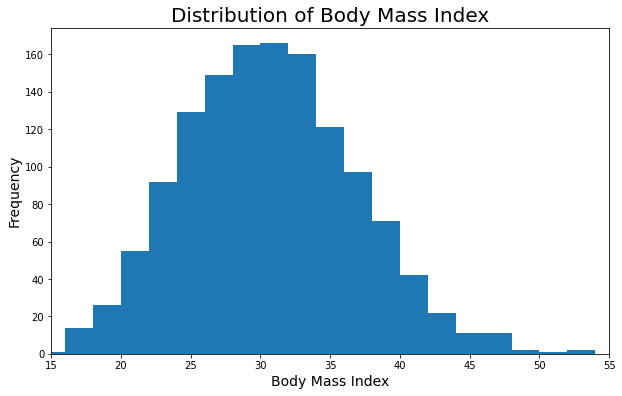

In [10]:
# set binsize
binsize = 2
bins = np.arange(0, df_clean['bmi'].max()+binsize, binsize)

# specify fig size
plt.figure(figsize=[10, 6])

# plot histogram
plt.hist(data=df_clean, x='bmi', bins=bins)
plt.xlim([15, 55])
plt.xlabel('Body Mass Index', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Body Mass Index', fontsize=20);

> From the histogram above, it can be observed that the "bmi" is normally distributed

### What is the relationship between "smoker" and "charges"?

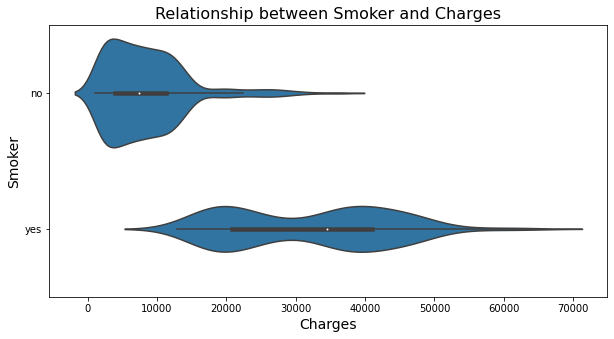

In [11]:
# choose a base color
base_color = sns.color_palette()[0]

# create violinplot to view relationship
plt.figure(figsize=[10, 5])
sns.violinplot(data=df_clean, x='charges', y='smoker', color=base_color)
plt.xlabel('Charges', fontsize=14)
plt.ylabel('Smoker', fontsize=14)
plt.title('Relationship between Smoker and Charges', fontsize=16);

> This is a violin plot 
the white dot represents the median
the thick gray bar in the center represents the interquartile range
the thin gray line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range

> The violin plot above shows that the median charges of the smoker is graeter than the non-smoker. This indicate that the smokers pays higher medical charges than those who do not smoke.

### What is the relationship between "smoker" and "region"?

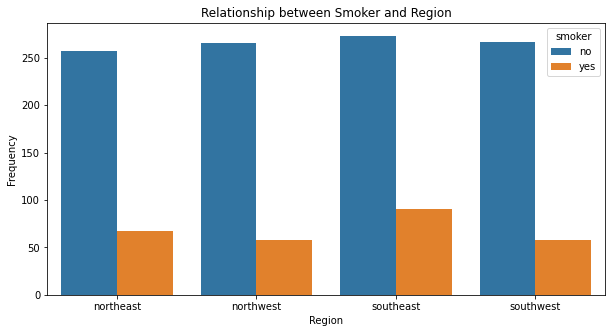

In [12]:
# plot bar chart
plt.figure(figsize=[10, 5])
sns.countplot(data=df_clean, x='region', hue='smoker')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Relationship between Smoker and Region');

> Southeast and northeast region have the largest number of smokers from the four regions

### What is the relationship between "bmi" and "sex"?

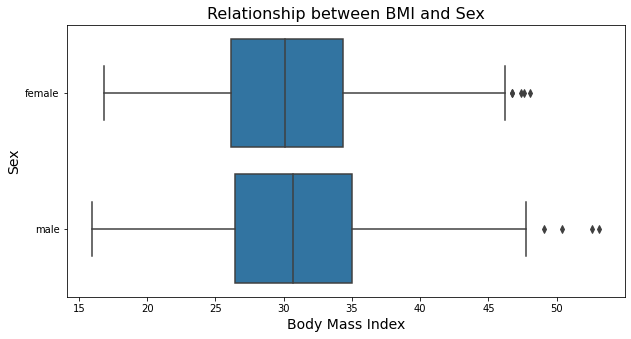

In [13]:
# choose a base color
base_color = sns.color_palette()[0]

# create boxplot to view relationship
plt.figure(figsize=[10, 5])
sns.boxplot(data=df_clean, x='bmi', y='sex', color=base_color)
plt.xlabel('Body Mass Index', fontsize=14)
plt.ylabel('Sex', fontsize=14)
plt.title('Relationship between BMI and Sex', fontsize=16);

> From the box plot above showing the relationship between 'bmi' and 'sex', it can be observed that the median of male bmi is higher than that of the female gender. This shows that male have higher bmi than the female gender.

### What is the relationship between "bmi" and "children"?

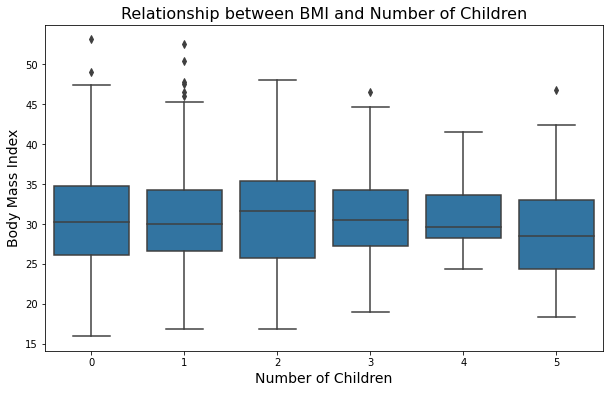

In [14]:
# choose a base color
base_color = sns.color_palette()[0]

# create boxplot to view relationship
plt.figure(figsize=[10, 6])
sns.boxplot(data=df_clean, x='children', y='bmi', color=base_color)
plt.xlabel('Number of Children', fontsize=14)
plt.ylabel('Body Mass Index', fontsize=14)
plt.title('Relationship between BMI and Number of Children', fontsize=16);

> From the box plot, the beneficiaries with two (2) children/dependants seem to have higher bmi than the other groups.

### What is the relationship between "age" and "bmi"?

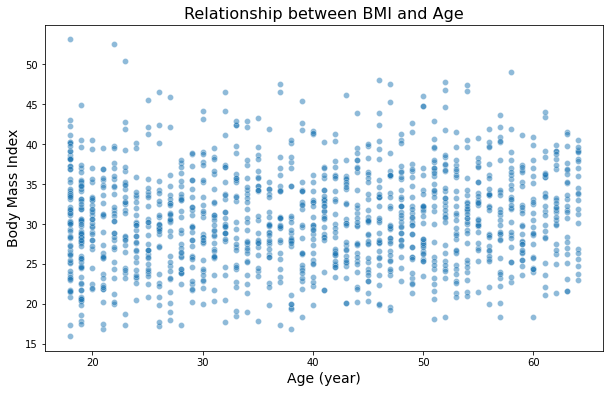

In [15]:
# scatter plot
plt.figure(figsize=[10, 6])
sns.scatterplot(data=df_clean, x='age', y='bmi', color=base_color, alpha=0.5);
plt.xlabel('Age (year)', fontsize=14)
plt.ylabel('Body Mass Index', fontsize=14)
plt.title('Relationship between BMI and Age', fontsize=16);

> The scatter plot shows that there no strong relationship between bmi and age of beneficiaries.

### What is the relationship between "charges" and "bmi"?

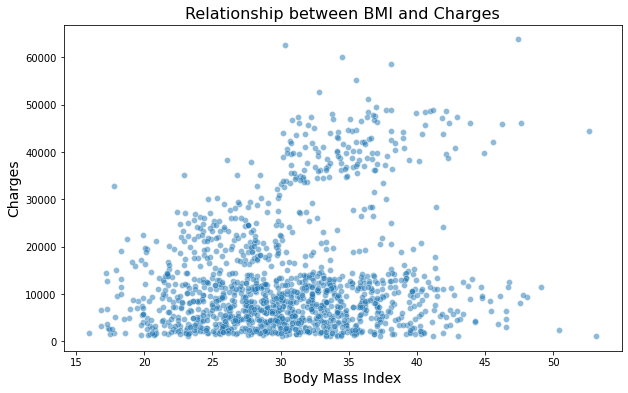

In [16]:
# line plot
plt.figure(figsize=[10, 6])
sns.scatterplot(data=df_clean, x='bmi', y='charges', color=base_color, alpha=0.5);
plt.xlabel('Body Mass Index', fontsize=14)
plt.ylabel('Charges', fontsize=14)
plt.title('Relationship between BMI and Charges', fontsize=16);

> From the scatter plot, medical charges tends to increase with increase in the body mass index of patient.

### What is the relationship between "age" and "charges"?

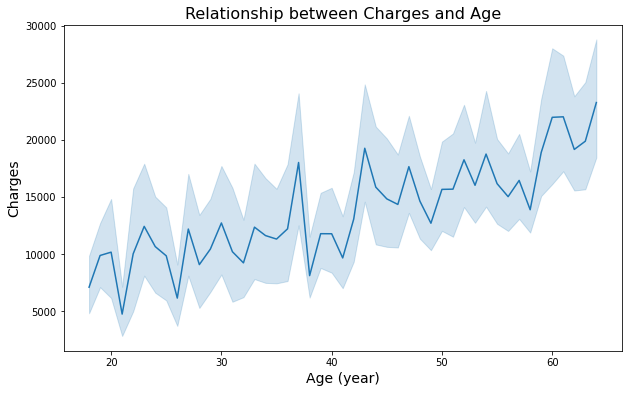

In [17]:
# line plot
plt.figure(figsize=[10, 6])
sns.lineplot(data=df_clean, x='age', y='charges', color=base_color);
plt.xlabel('Age (year)', fontsize=14)
plt.ylabel('Charges', fontsize=14)
plt.title('Relationship between Charges and Age', fontsize=16);

> From the line plot above, it can be seen that the medical charges tend to increase with increase in age.

### Which "region" have the highest number of "children"?

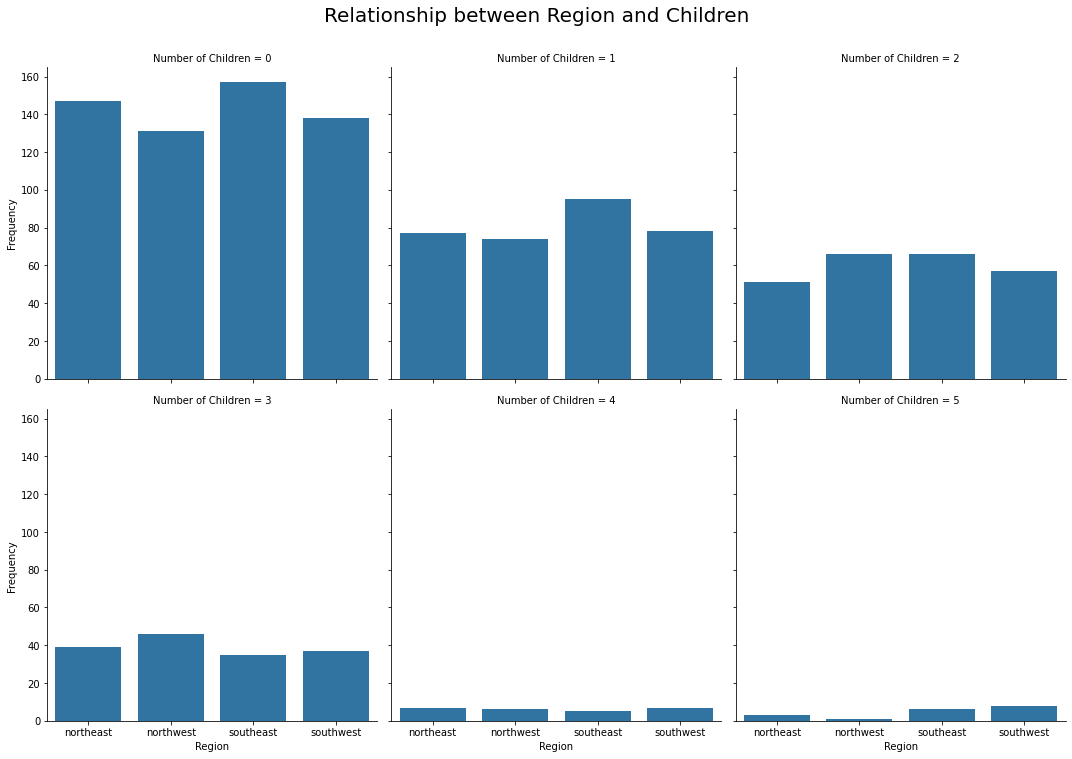

In [18]:
# plot bar chart

g = sns.catplot(
    data=df_clean, 
    x='region', 
    col='children', 
    col_wrap=3, 
    kind='count', 
    color=base_color
);
g.set(xlabel='Region', ylabel='Frequency')
g.set_titles("Number of Children = {col_name}", fontsize=14)
g.fig.suptitle('Relationship between Region and Children', fontsize=20, y=1.05);

> From the bar plot above, the following conclution can be drawn;


1.   Southeast has the largest number of beneficiaries with no child
2.   Southeast has the largest number of beneficiaries with 1 child
3.   Northwest and Southeast have the largest number of beneficiaries with 2 children
4.   Northwest has the largest number of beneficiaries with 3 children
5.   Southwest has the largest number of beneficiaries with more than 3 children



### What is relationship between “region”, “smoker” and “bmi”?

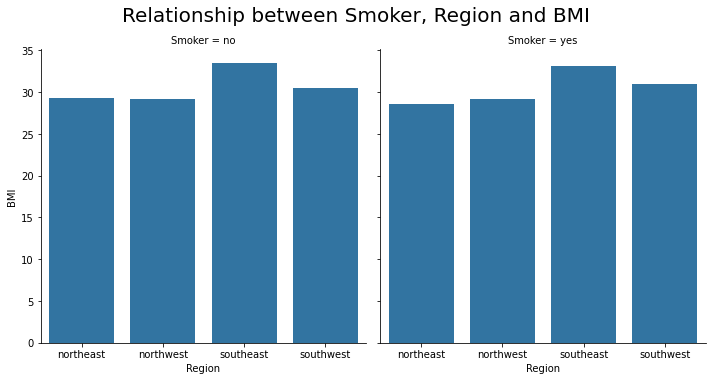

In [19]:
# plot bar chart
g = sns.catplot(data=df_clean, x='region', y='bmi', col='smoker', ci=None, kind='bar', color=base_color)
g.set(xlabel='Region', ylabel='BMI')
g.set_titles("Smoker = {col_name}", fontsize=14)
g.fig.suptitle('Relationship between Smoker, Region and BMI', fontsize=20, y=1.05);

> There seems to be no significant difference in the bmi of smokers and non-smokers across the four regions. 

### Are there outliers in "bmi"?

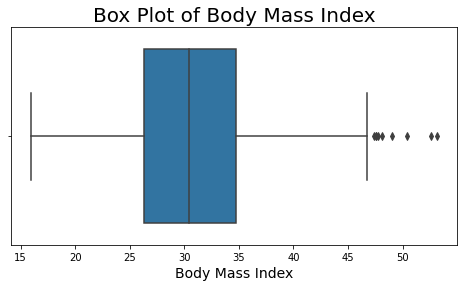

In [20]:
# check for outliers in bmi
plt.figure(figsize=[8, 4])
sns.boxplot(data=df_clean, x='bmi')
plt.xlabel('Body Mass Index', fontsize=14)
plt.title('Box Plot of Body Mass Index', fontsize=20);

The bmi value from the dataset, ranges from 15.96 to 53.13 with view values outside the spread of the boxplot. There tends to be some outlier in the dataset. To understand what outlier means in this domain, we search for the range of bmi value for adults between the age of 18 and 64.

> According to the National Health Service (NHS) in UK, the ideal BMI range for most adults is from 18.5 to 24.9. 
The NHS gave the following classification of BMI;
> - below 18.5 – underweight range
> - between 18.5 and 24.9 – healthy weight range
> - between 25 and 29.9 – overweight range
> - between 30 and 39.9 – obese range

> (source: https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/)

> Also for pregnant women, bmi could range from 37 - 54 
(source: https://www.cdc.gov/reproductivehealth/maternalinfanthealth/pregnancy-weight-gain.htm) 

In [21]:
# check all the greater than 50
df_clean[df_clean['bmi'] > 50]

age   sex    bmi  children smoker     region     charges
847    23  male  50.38         1     no  southeast   2438.0552
1047   22  male  52.58         1    yes  southeast  44501.3982
1317   18  male  53.13         0     no  southeast   1163.4627

> If we assume that some beneficiaries are suffering from severe obesity condition and some female in the dataset might be pregnant, male beneficiaries with bmi greater than 50 will be treated as outliers and will be dropped from the dataset.

In [22]:
# drop bmi for male greater than 50
df_clean = df_clean[df_clean['bmi'] < 50]

# check to confirm drop
df_clean[df_clean['bmi'] > 50]

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

### What is the correlation between numeric variables?

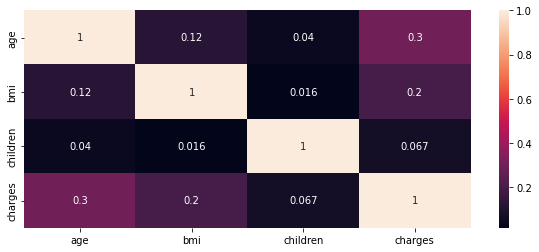

In [23]:
# compute correlation
corr = df_clean.corr()

# plot correlation heatmap
plt.figure(figsize=[10,4])
sns.heatmap(corr, annot=True);

> There is no much linear correlation between the numeric variables. Nevertheless, bmi and age seems to have low positive linear correlation with charges. There is no problem of multi-collinearity within the numeric features.

## Model building

We start building of the model using linear regression and gradually increase the model complexity to observe how each model perform. We start without scalling the data and later scale the data to observe the effects of scalling the performance of the dataset 

### Split Data

In [24]:
features = df_clean.drop("charges", axis=1)
target = df_clean["charges"]
X = features
y = target

display(X.head())
display(y.head())

age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [25]:
# encode categorical variables
le = LabelEncoder()
X["sex"]  = le.fit_transform(X["sex"])
X["smoker"]  = le.fit_transform(X["smoker"])
X["region"]  = le.fit_transform(X["region"])

In [26]:
X.head()

age  sex     bmi  children  smoker  region
0   19    0  27.900         0       1       3
1   18    1  33.770         1       0       2
2   28    1  33.000         3       0       2
3   33    1  22.705         0       0       1
4   32    1  28.880         0       0       1

In [27]:
# split training and testing data with ratio 80 to 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

In [28]:
print(X_train.shape)
print(X_test.shape)

(1067, 6)
(267, 6)


### Baseline Model

In [34]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
print("Mean Charges: ", round(y_mean, 2))
print("Baseline MAE: ", round(mean_absolute_error(y_train, y_pred_baseline),2))
print("Baseline R2 Score: ", round(r2_score(y_train, y_pred_baseline),2))

Mean Charges:  12843.65
Baseline MAE:  8675.59
Baseline R2 Score:  0.0


> We set a baseline model which predict the mean of the target variable for all predictions. Our model should perform better than the baseline model

### Linear Regression Model

In [30]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred_training = linreg_model.predict(X_train)
y_pred_test = linreg_model.predict(X_test)
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test MAE:", round(mean_absolute_error(y_test, y_pred_test),2))
print("\nTraining R2 Score: ", round(r2_score(y_train, y_pred_training),2))
print("Test R2 Score: ", round(r2_score(y_test, y_pred_test),2))

Training MAE: 4131.34
Test MAE: 4308.41

Training R2 Score:  0.73
Test R2 Score:  0.79


> The linear regression model performs better than the baseline model. It also performs better on both the training and test data. Since the difference between the mean absolute error of the training and test data is small, the model does not over fit the training data.

> We will explore other models to see if we can get a better performing model. 

### Random Forest Regressor Model

In [76]:
rf_model1 = RandomForestRegressor()
rf_model1.fit(X_train, y_train)

RandomForestRegressor()

In [74]:
y_pred_training = rf_model1.predict(X_train)
y_pred_test = rf_model1.predict(X_test)
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test MAE:", round(mean_absolute_error(y_test, y_pred_test),2))
print("\nTraining R2 Score: ", round(r2_score(y_train, y_pred_training),2))
print("Test R2 Score: ", round(r2_score(y_test, y_pred_test),2))

Training MAE: 1134.59
Test MAE: 2777.67

Training R2 Score:  0.97
Test R2 Score:  0.86


> The random forest regressor performs very well on the training data and poorly on the test data, that is, it over fit. We try to change the input parameters to improve the performance of the model 

In [105]:
rf_model2 = RandomForestRegressor(n_estimators=10, max_depth=5)
rf_model2.fit(X_train, y_train)

y_pred_training = rf_model2.predict(X_train)
y_pred_test = rf_model2.predict(X_test)
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test MAE:", round(mean_absolute_error(y_test, y_pred_test),2))
print("\nTraining R2 Score: ", round(r2_score(y_train, y_pred_training),2))
print("Test R2 Score: ", round(r2_score(y_test, y_pred_test),2))

Training MAE: 2257.18
Test MAE: 2519.37

Training R2 Score:  0.88
Test R2 Score:  0.88


> After several trial of changing the maximum depth and number of estimator, we got a stable performance at n_estimator=10 and max_depth=5

### Xgboost Model

In [93]:
xgb1_model = XGBRegressor()
xgb1_model.fit(X_train, y_train)

[01:05:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [94]:
y_pred_training = xgb1_model.predict(X_train)
y_pred_test = xgb1_model.predict(X_test)
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test MAE:", round(mean_absolute_error(y_test, y_pred_test),2))
print("\nTraining R2 Score: ", round(r2_score(y_train, y_pred_training),2))
print("Test R2 Score: ", round(r2_score(y_test, y_pred_test),2))

Training MAE: 2052.78
Test MAE: 2513.85

Training R2 Score:  0.89
Test R2 Score:  0.88


> The Xgboost model performs well on both training and test data. The R2 score is similar to what we got with the Random Foreest Regressor. We try to tune some parameter to improve the performance of the model

In [103]:
xgb2_model = XGBRegressor(n_estimators=100, max_depth=2)
xgb2_model.fit(X_train, y_train)

y_pred_training = xgb2_model.predict(X_train)
y_pred_test = xgb2_model.predict(X_test)
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test MAE:", round(mean_absolute_error(y_test, y_pred_test),2))
print("\nTraining R2 Score: ", round(r2_score(y_train, y_pred_training),2))
print("Test R2 Score: ", round(r2_score(y_test, y_pred_test),2))

[01:20:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training MAE: 2012.0
Test MAE: 3419.0

Training R2 Score:  0.92
Test R2 Score:  0.83


> On several trials, the Xgboost model either over fit or under fit on the training data. We were unable to improve the performance of the model

## Data Preproccessing

In [108]:
Xtrain = X_train.copy()
Xtest = X_test.copy()

#Standard Scaler
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.fit_transform(X_test)

#Minmax Scaler
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.fit_transform(X_test)

#Normalization
X_train_normalize = preprocessing.normalize(X_train)
X_test_normalize = preprocessing.normalize(X_test)

train_list = [Xtrain,X_train_standard,X_train_minmax,X_train_normalize]
scaler_list = ["without_scaler","standard_scaler","minmax_scaler","normalize"]

> We used two different scaler and one normalizer and raw data to try out all types and decide which gives the best score

## Model Selection using Cross Validation

In [109]:
kfold = StratifiedKFold(n_splits=10)
random_state = 42
z = 0

for i in train_list:
    linear_model = LinearRegression().fit(i,y_train)
    knn_model = KNeighborsRegressor().fit(i, y_train)
    decision_model = DecisionTreeRegressor().fit(i,y_train)
    mlp_model = MLPRegressor().fit(i, y_train)
    gaussian_model = BayesianRidge().fit(i, y_train)
    linear_svm_model = SVR(kernel='linear').fit(i,y_train)
    adaboost_model = AdaBoostRegressor(DecisionTreeRegressor(), learning_rate=0.1).fit(i,y_train)
    randomforest_model = RandomForestRegressor().fit(i,y_train)
    extra_model = ExtraTreesRegressor().fit(i,y_train)
    gb_model = GradientBoostingRegressor().fit(i,y_train)
    xgb_model = XGBRegressor().fit(i,y_train)
    lgbm_model = LGBMRegressor().fit(i,y_train)
    elastic_model = ElasticNet().fit(i,y_train)
    sgd_model = SGDRegressor().fit(i,y_train)
    kernel_model = KernelRidge().fit(i,y_train)
    model_names = ["Linear","Knn","DecisionTree","MLP","GaussianNB","SupportVectorMachine","AdaBoost","RandomForest","ExtraTrees","GradientBoost","Xgboost","Lightgbm", "Elastic", "SGD", "Kernel Ridge"]
    model_list = [linear_model,knn_model,decision_model,mlp_model,gaussian_model,linear_svm_model,adaboost_model,randomforest_model,extra_model,gb_model,xgb_model,lgbm_model,elastic_model,sgd_model,kernel_model]
    results = []
    z +=1
    if z ==1:
        print("*"*30, f"{scaler_list[z-1]}","*"*30)
    if z ==2:
        print("*"*30, f"{scaler_list[z-1]}","*"*30)
    if z ==3:
        print("*"*30, f"{scaler_list[z-1]}","*"*30)
    if z ==4:
        print("*"*30, f"{scaler_list[z-1]}","*"*30)
    for j in model_list:
        result = cross_val_score(j, i, y_train, scoring = "r2", cv = 5, n_jobs=4)
        results.append(result.mean())

    acc_of_models = {"Model": model_names, "R2": results}    
    acc_of_models = pd.DataFrame(acc_of_models)
    display(acc_of_models)
    print(np.max(acc_of_models["R2"]))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[02:44:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
****************************** without_scaler ******************************


Model            R2
0                 Linear  7.227982e-01
1                    Knn  4.685128e-02
2           DecisionTree  6.587124e-01
3                    MLP -1.427832e-01
4             GaussianNB  7.228145e-01
5   SupportVectorMachine -1.219639e-01
6               AdaBoost  7.834992e-01
7           RandomForest  8.256897e-01
8             ExtraTrees  8.037828e-01
9          GradientBoost  8.397216e-01
10               Xgboost  8.435270e-01
11              Lightgbm  8.267576e-01
12               Elastic  3.702524e-01
13                   SGD -1.794256e+13
14          Kernel Ridge  6.957435e-01

0.8435269993548269


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[02:45:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
****************************** standard_scaler ******************************


Model        R2
0                 Linear  0.722798
1                    Knn  0.788817
2           DecisionTree  0.659552
3                    MLP -1.144541
4             GaussianNB  0.722823
5   SupportVectorMachine -0.025136
6               AdaBoost  0.795517
7           RandomForest  0.825296
8             ExtraTrees  0.803305
9          GradientBoost  0.840040
10               Xgboost  0.843504
11              Lightgbm  0.826083
12               Elastic  0.643478
13                   SGD  0.722873
14          Kernel Ridge -0.516167

0.8435037096690927


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[02:45:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
****************************** minmax_scaler ******************************


Model        R2
0                 Linear  0.722798
1                    Knn  0.753904
2           DecisionTree  0.675849
3                    MLP -1.118080
4             GaussianNB  0.722827
5   SupportVectorMachine -0.087998
6               AdaBoost  0.791661
7           RandomForest  0.824695
8             ExtraTrees  0.801883
9          GradientBoost  0.839549
10               Xgboost  0.843488
11              Lightgbm  0.826317
12               Elastic  0.284088
13                   SGD  0.722336
14          Kernel Ridge  0.721761

0.843488381827503


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[02:45:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
****************************** normalize ******************************


Model        R2
0                 Linear  0.518230
1                    Knn  0.269122
2           DecisionTree  0.633352
3                    MLP -1.177395
4             GaussianNB  0.518279
5   SupportVectorMachine -0.099805
6               AdaBoost  0.775049
7           RandomForest  0.807346
8             ExtraTrees  0.800729
9          GradientBoost  0.803752
10               Xgboost  0.808315
11              Lightgbm  0.789165
12               Elastic  0.003000
13                   SGD  0.046024
14          Kernel Ridge  0.099130

0.8083146539531253


> The best score was XGBRegrossor algorithm trained with min-max scaled data

### Xgboost Model with Scaled Data

In [111]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train_minmax, y_train)

y_pred_training = xgb_model.predict(X_train_minmax)
y_pred_test = xgb_model.predict(X_test_minmax)
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test MAE:", round(mean_absolute_error(y_test, y_pred_test),2))
print("\nTraining R2 Score: ", round(r2_score(y_train, y_pred_training),2))
print("Test R2 Score: ", round(r2_score(y_test, y_pred_test),2))

[03:09:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training MAE: 2052.78
Test MAE: 2632.8

Training R2 Score:  0.89
Test R2 Score:  0.86


> The scaled dataset almost produced a similar result when compared with the non-scaled data. The performance of the non-scaled data is better, that is, scalling those not necessarily improved the performance of the model.

### Hyperparameter Tuning Using Grid Search

In [112]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='r2',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [114]:
model = XGBRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.5, 0.6, 0.7],
    'max_depth': [5, 10, 15],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.5, 0.7, 0.8]
}

model, pred = algorithm_pipeline(X_train_minmax, 
                                 X_test_minmax,
                                 y_train, y_test, 
                                 model, 
                                 param_grid, 
                                 cv=5)

# Root Mean Squared Error
print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[03:55:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.826979434579499
{'colsample_bytree': 0.7, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 1.3, 'reg_lambda': 1.3, 'subsample': 0.8}


In [116]:
print(round(r2_score(y_test, pred),2))

0.85


The grid search hyperparameter tunning we carried did not result into a better performed model. Due to the computation expensivity of the grid search, we could not increase the tuning parameters.

## Conclusions

After model selection and hyperparameter tunning, the best performing models are Xgboost and Random Forest Regressor. They both performed well on the training and test data resulting to an R-squared of 88%.